## Import libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from sklearn.preprocessing import OneHotEncoder

## Load and explore the data 

In [17]:
df = pd.read_csv('../data/adult.csv')

In [22]:
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [27]:
#change income column to '0' and '1'
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [29]:
df.shape

(48842, 15)

## List of problems to answer from the dataset

1. Is there difference in income by gender or race?
2. Which factors have the biggest influence on income?
3. How is `income` correlated with workclass, marital status, and occupation?

### Question 1: Is there difference in income by gender or race?

<AxesSubplot:xlabel='race', ylabel='income'>

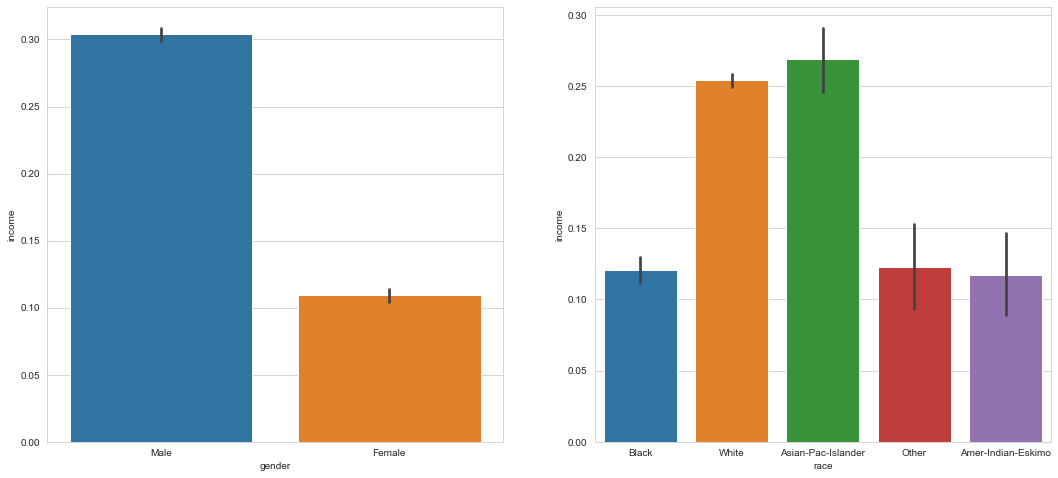

In [48]:
fig, ax=plt.subplots(1,2, figsize=(18,8))
sns.barplot(y='income', x='gender', data= df, ax=ax[0])
sns.barplot(y='income', x='race', data= df, ax=ax[1])

In [40]:
mean = df[['income', 'gender']].groupby('gender').agg(np.mean)
print(mean)

          income
gender          
Female  0.109251
Male    0.303767


There are 10.93% female employees having income >=50k annually, while this number in male employees is 30.38%. 

In [53]:
mean = df[['income', 'race']].groupby('race').agg(np.mean).sort_values(by = 'income')
print(mean)

                      income
race                        
Amer-Indian-Eskimo  0.117021
Black               0.120811
Other               0.123153
White               0.253987
Asian-Pac-Islander  0.269256


Amer-Indian-Eskimo has the lowest rate of employees having income >= 50K at 11.7%, while Asian-Pac-Islander has the highest rate at 26.93%. There is a big difference between the second highest and third highest, at 25.4% and 12.32% respectively.
The standard deviation is small for black and white groups, while it is large for Asian-Pac-Islander, Amer-Indian-Eskimo and other groups, which is expected since these groups are more diverse.

### Question 2: Which factors have the biggest influence on income?

In [60]:
#the correlation of `income` with other columns
df[df.columns[0:]].corr()['income'][:-1]

age                0.230369
fnlwgt            -0.006339
educational-num    0.332613
capital-gain       0.223013
capital-loss       0.147554
hours-per-week     0.227687
Name: income, dtype: float64

Among numerical factors, `educational number` has the greatest correlation with `income`, followed by `age` and `hours-per-week`. 

### Question 3: How is income correlated with workclass, marital status, and occupation?

The factors we consider now are categorical with no clear rank. We use OneHotEncoder to change them to 